In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("SCOM.csv")
df

,Date,Open,High,Low,Close,Volume
0,06/23/23,17.75,17.80,17.40,17.50,9481100
1,06/22/23,17.00,17.80,17.00,17.45,4990500
2,06/21/23,16.40,17.00,16.40,16.80,2504300
3,06/20/23,16.10,16.50,15.90,16.25,1425100
4,06/19/23,15.50,16.30,15.45,16.05,477200
...,...,...,...,...,...,...
1363,01/08/18,27.50,28.25,27.50,28.00,6873500
1364,01/05/18,27.50,28.50,27.00,28.00,11038400
1365,01/04/18,26.75,27.75,26.75,27.00,8304500
1366,01/03/18,26.75,27.00,26.75,26.75,8347900


In [3]:
df = pd.read_csv("SCOM.csv", skipinitialspace=True)
df

,Date,Open,High,Low,Close,Volume
0,06/23/23,17.75,17.80,17.40,17.50,9481100
1,06/22/23,17.00,17.80,17.00,17.45,4990500
2,06/21/23,16.40,17.00,16.40,16.80,2504300
3,06/20/23,16.10,16.50,15.90,16.25,1425100
4,06/19/23,15.50,16.30,15.45,16.05,477200
...,...,...,...,...,...,...
1363,01/08/18,27.50,28.25,27.50,28.00,6873500
1364,01/05/18,27.50,28.50,27.00,28.00,11038400
1365,01/04/18,26.75,27.75,26.75,27.00,8304500
1366,01/03/18,26.75,27.00,26.75,26.75,8347900


In [4]:
for idx, row in df.iterrows():
    row.Date = datetime.strptime(row.Date, '%m/%d/%y').date()
    # row.Date = row.Date.strftime("%Y-%m-%d")
    df.at[idx,"Date"] = row.Date

print(df)

            Date   Open   High    Low  Close    Volume
0     2023-06-23  17.75  17.80  17.40  17.50   9481100
1     2023-06-22  17.00  17.80  17.00  17.45   4990500
2     2023-06-21  16.40  17.00  16.40  16.80   2504300
3     2023-06-20  16.10  16.50  15.90  16.25   1425100
4     2023-06-19  15.50  16.30  15.45  16.05    477200
...          ...    ...    ...    ...    ...       ...
1363  2018-01-08  27.50  28.25  27.50  28.00   6873500
1364  2018-01-05  27.50  28.50  27.00  28.00  11038400
1365  2018-01-04  26.75  27.75  26.75  27.00   8304500
1366  2018-01-03  26.75  27.00  26.75  26.75   8347900
1367  2018-01-02  26.75  27.00  26.75  26.75   3904800

[1368 rows x 6 columns]


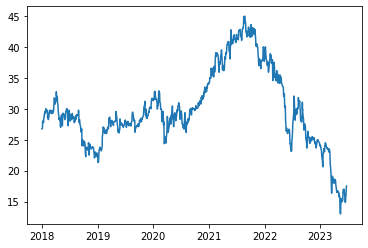

In [5]:
plt.plot(df.Date, df.Close)

In [6]:
df = df.iloc[::-1]
df

,Date,Open,High,Low,Close,Volume
1367,2018-01-02,26.75,27.00,26.75,26.75,3904800
1366,2018-01-03,26.75,27.00,26.75,26.75,8347900
1365,2018-01-04,26.75,27.75,26.75,27.00,8304500
1364,2018-01-05,27.50,28.50,27.00,28.00,11038400
1363,2018-01-08,27.50,28.25,27.50,28.00,6873500
...,...,...,...,...,...,...
4,2023-06-19,15.50,16.30,15.45,16.05,477200
3,2023-06-20,16.10,16.50,15.90,16.25,1425100
2,2023-06-21,16.40,17.00,16.40,16.80,2504300
1,2023-06-22,17.00,17.80,17.00,17.45,4990500


In [7]:
ma100 = df.Close.rolling(100).mean()
ma100.head(101)

1367        NaN
1366        NaN
1365        NaN
1364        NaN
1363        NaN
         ...   
1271        NaN
1270        NaN
1269        NaN
1268    29.3550
1267    29.3775
Name: Close, Length: 101, dtype: float64

In [8]:
ma200 =df.Close.rolling(200).mean()
ma200

1367         NaN
1366         NaN
1365         NaN
1364         NaN
1363         NaN
          ...   
4       22.07525
3       22.01625
2       21.95900
1       21.90525
0       21.85300
Name: Close, Length: 1368, dtype: float64

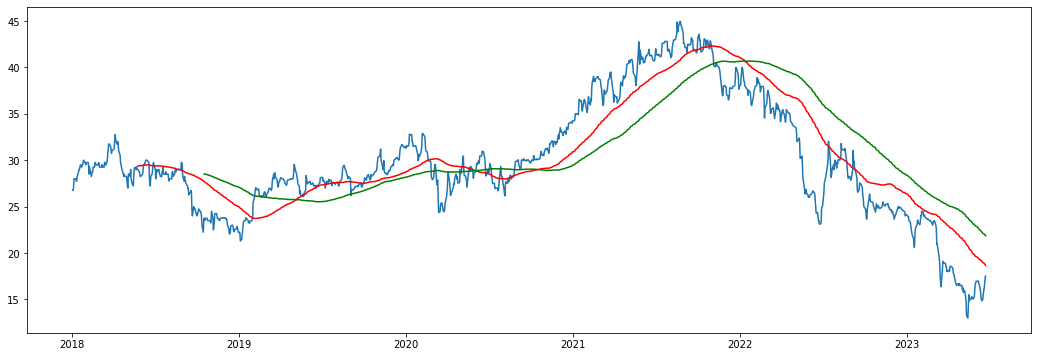

In [9]:
plt.figure(figsize = (18,6))# Size of figure
plt.plot(df.Date, df.Close)# actual graph of mas
plt.plot(df.Date, ma100, "r")# colour
plt.plot(df.Date, ma200, "g")

In [10]:
df = df.reset_index()
df.tail()

,index,Date,Open,High,Low,Close,Volume
1363,4,2023-06-19,15.50,16.3,15.45,16.05,477200
1364,3,2023-06-20,16.10,16.5,15.90,16.25,1425100
1365,2,2023-06-21,16.40,17.0,16.40,16.80,2504300
1366,1,2023-06-22,17.00,17.8,17.00,17.45,4990500
1367,0,2023-06-23,17.75,17.8,17.40,17.50,9481100


In [11]:
# split into train and test
data_train = pd.DataFrame(df["Close"][0 : int(len(df) * 0.70)])
data_test = pd.DataFrame(df["Close"][int(len(df) * 0.70) : int(len(df))])

print(data_train.shape)
print(data_test.shape)

(957, 1)
(411, 1)


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler(feature_range=(0,1))


In [20]:
from keras.models import load_model
model = load_model("saf_model")

In [21]:
# Append the past 100 days to testing data
past_100_days = data_train.tail(100)
final_df = pd.concat([past_100_days, data_test], ignore_index=True)

In [22]:
# Scale down testing data
input_data = scaler.fit_transform(final_df)
input_data
input_data.shape

(511, 1)

In [23]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i - 100: i])
    y_test.append(input_data[i, 0])
    
# Convert to numpy arrays
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(411, 100, 1)
(411,)


(411, 1)
[0.0312989]


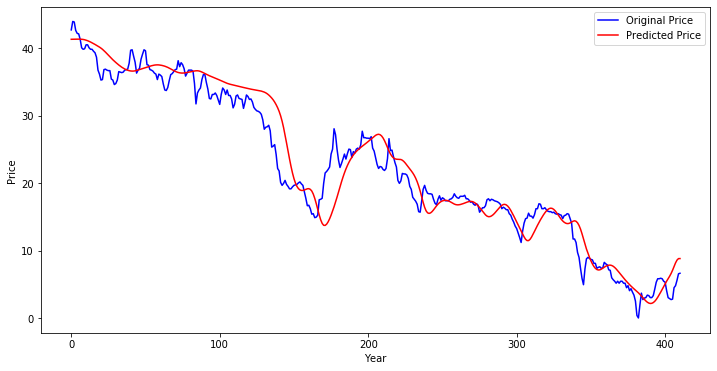

In [24]:
# Making Predictions
y_predicted = model.predict(x_test)
print(y_predicted.shape)
# print(y_predicted)
print(scaler.scale_)

# scale up
scale_factor = 1/0.02123255
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

plt.figure(figsize=(12,6))
plt.plot(y_test, "b", label="Original Price")
plt.plot(y_predicted, "r", label="Predicted Price")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()